# Financial Trends in Australia and the United States

In [1]:
# importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import requests

In [2]:
# Study data files
an_wage_path = "data/oecd_av_wage_1990 - 2021_annual_au_us.csv"
cpi_path = "data/oecd_cpi.csv"

# Read data files into dataframes
an_wage_df = pd.read_csv(an_wage_path)
cpi_df = pd.read_csv(cpi_path)

# Drop unwanted rows
clean_an_wage_df = an_wage_df.iloc[0:64]

# Drop unwanted columns
selected_columns = ['Country', 'Time', 'Unit Code', 'Value']
clean_an_wage_df = clean_an_wage_df[selected_columns]
clean_cpi_df = cpi_df[selected_columns]

# Change column name
clean_an_wage_df = clean_an_wage_df.rename(columns={'Value':'Annual Wage(Avg.)'})
clean_cpi_df = clean_cpi_df.rename(columns={'Value':'CPI'})

# Merge dataframes
dataset = pd.merge(clean_an_wage_df, clean_cpi_df, on=['Country', 'Time'])

# Remove decimal of Annual Wage column 
dataset.loc[:,'Annual Wage(Avg.)'] = dataset.loc[:,'Annual Wage(Avg.)'].astype(int)

# Making two seperate Data Frames, 1 each for Australia and US
au_df = dataset.loc[dataset['Country'] == 'Australia']
us_df = dataset.loc[dataset['Country'] == 'United States']

# Printing Complete Data Frame
print(dataset.to_string())

          Country  Time Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI
0       Australia  1990         AUD              33030          PC  7.333022
1       Australia  1991         AUD              34096          PC  3.176675
2       Australia  1992         AUD              35438          PC  1.012231
3       Australia  1993         AUD              36516          PC  1.753653
4       Australia  1994         AUD              37344          PC  1.969635
5       Australia  1995         AUD              38243          PC  4.627767
6       Australia  1996         AUD              40124          PC  2.615385
7       Australia  1997         AUD              41921          PC  0.224887
8       Australia  1998         AUD              43097          PC  0.860135
9       Australia  1999         AUD              44579          PC  1.483129
10      Australia  2000         AUD              46246          PC  4.457435
11      Australia  2001         AUD              48315          PC  4.407135

In [3]:
# Calculate Relative Cumulative CPI since 1990 (assuming cumulative CPI in 1990 = 7.333022)

# For AU
# Getting the CPI column
au_CPI_sr = au_df.loc[:,"CPI"].astype(float)

# Calculating cumulative CPI for each year and adding them to a new column
CPI_cumu_list1 = []
total1 = 0
for i in au_CPI_sr:
    total1 += i
    CPI_cumu_list1.append(total1)
au_df["CPI Cumulative"] = CPI_cumu_list1

# Printing AU Data Frame
print(au_df)

# US
# Getting the CPI column
us_CPI_sr = us_df.loc[:,"CPI"].astype(float)

# Calculating cumulative CPI for each year and adding them to a new column
CPI_cumu_list2 = []
total2 = 0
for i in us_CPI_sr:
    total2 += i
    CPI_cumu_list2.append(total2)
us_df["CPI Cumulative"] = CPI_cumu_list2

# Printing US Data Frame
print(us_df)

      Country  Time Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI  \
0   Australia  1990         AUD              33030          PC  7.333022   
1   Australia  1991         AUD              34096          PC  3.176675   
2   Australia  1992         AUD              35438          PC  1.012231   
3   Australia  1993         AUD              36516          PC  1.753653   
4   Australia  1994         AUD              37344          PC  1.969635   
5   Australia  1995         AUD              38243          PC  4.627767   
6   Australia  1996         AUD              40124          PC  2.615385   
7   Australia  1997         AUD              41921          PC  0.224887   
8   Australia  1998         AUD              43097          PC  0.860135   
9   Australia  1999         AUD              44579          PC  1.483129   
10  Australia  2000         AUD              46246          PC  4.457435   
11  Australia  2001         AUD              48315          PC  4.407135   
12  Australi

C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


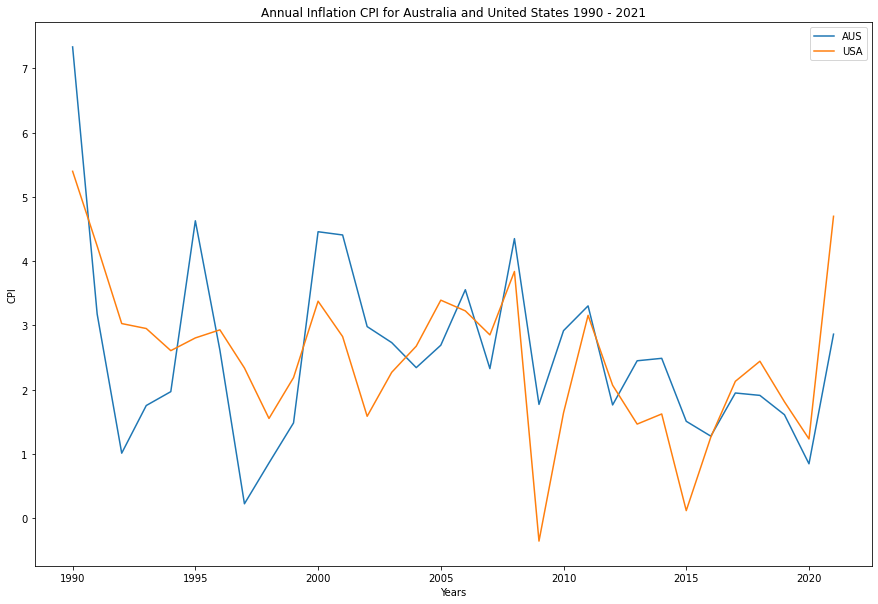

In [4]:
# Plot Australia vs US CPI (Year-ended) on 1 graph

ax = au_df.plot(x='Time', y='CPI', label='AUS', figsize = (15,10))
us_df.plot(ax=ax, x='Time', y='CPI', label="USA" )
plt.ylabel('CPI')
plt.xlabel('Years')
plt.title('Annual Inflation CPI for Australia and United States 1990 - 2021')
plt.legend()
plt.show()

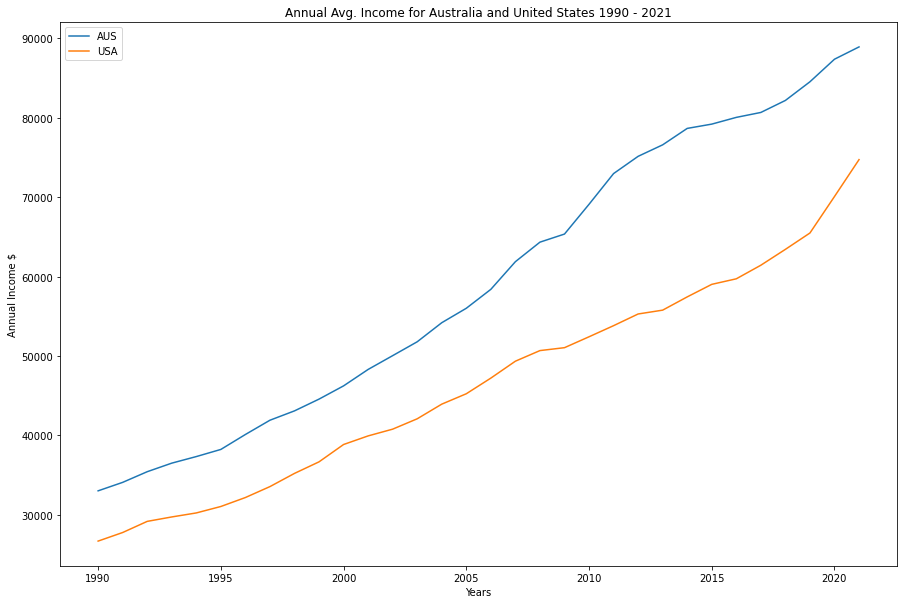

In [5]:
# Plot Australia vs US Average wage growth on 1 graph

ax = au_df.plot(x='Time', y='Annual Wage(Avg.)', label='AUS', figsize = (15,10))
us_df.plot(ax=ax, x='Time', y='Annual Wage(Avg.)', label="USA" )
plt.ylabel('Annual Income $')
plt.xlabel('Years')
plt.title('Annual Avg. Income for Australia and United States 1990 - 2021')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Australia Inflation vs Annual Avg. Income')

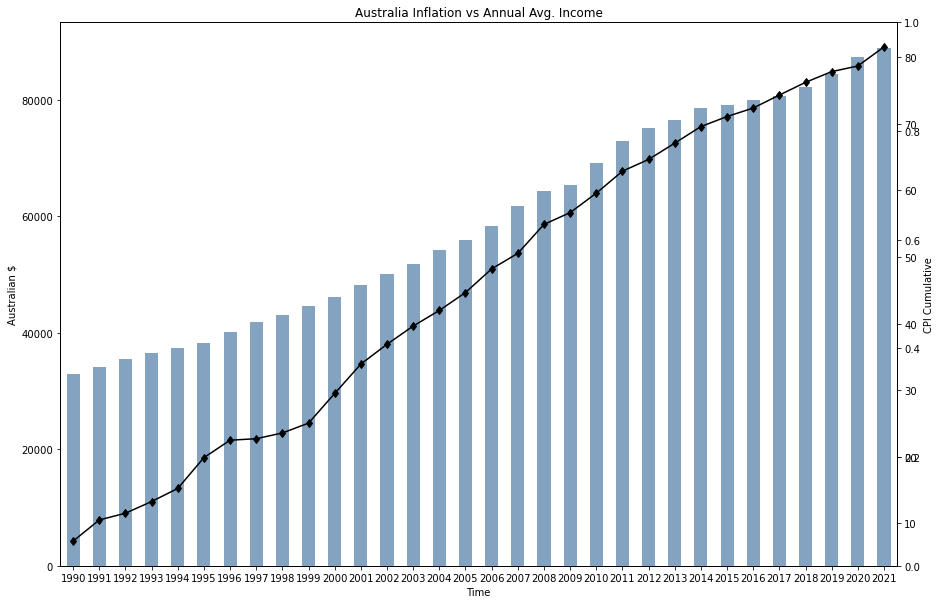

In [13]:
# Australia relative cumulative CPI vs Annual Avg. Income

# Setting Time as index
time_idx_df = au_df.set_index(au_df['Time'])

# Plotting the data
fig, ax1 = plt.subplots(figsize = (15,10))
time_idx_df['Annual Wage(Avg.)'].plot(kind = 'bar', color=(0.2, 0.4, 0.6, 0.6))
au_df['CPI Cumulative'].plot(kind='line', marker='d', secondary_y=True, color='black')
ax2 = ax1.twinx()
ax1.set_ylabel('Australian $')
ax2.set_ylabel('CPI Cumulative')
plt.title('Australia Inflation vs Annual Avg. Income')

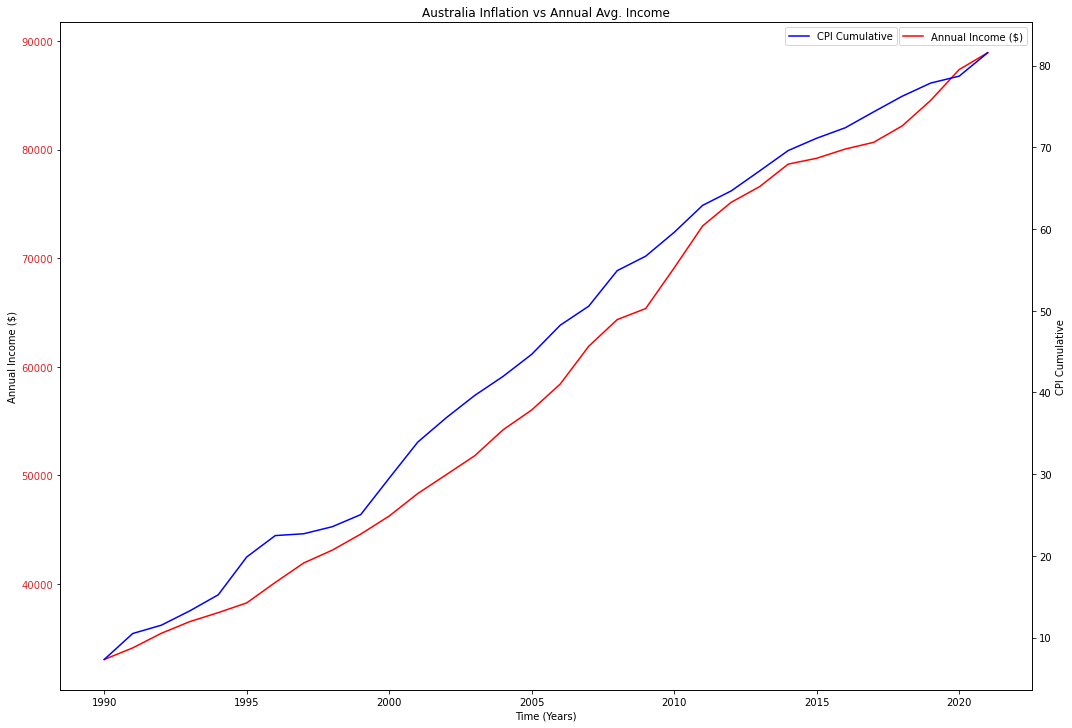

In [7]:
# Australia relative cumulative CPI vs Annual Avg. Income

# Assigning columns
y2 = au_df["CPI Cumulative"]
x2 = au_df["Annual Wage(Avg.)"]
x1 = au_df["Time"]

fig, ax1 = plt.subplots(figsize = (15,10))

# Assigning the color of each line
color = 'tab:red'

# Adding labels of each axis
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Annual Income ($)')

ax1.plot(x1, x2, color='r')

# Adding tick parameters for Annual Avg. Income
ax1.tick_params(axis='y', labelcolor=color)

# Adding legend for Annual Avg. Income
label2=['Annual Income ($)']
plt.legend(label2, loc="best")

# Plotting on 2 different y-axes
ax2 = ax1.twinx()

ax2.set_ylabel('CPI Cumulative')

ax2.plot(x1, y2, color='b')

# Adding tick parameters for CPI Cumulative
ax2.tick_params(axis='y')

fig.tight_layout()

# Adding legend for CPI Cumulative and graph title
label1=['CPI Cumulative']
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('Australia Inflation vs Annual Avg. Income')
plt.show()

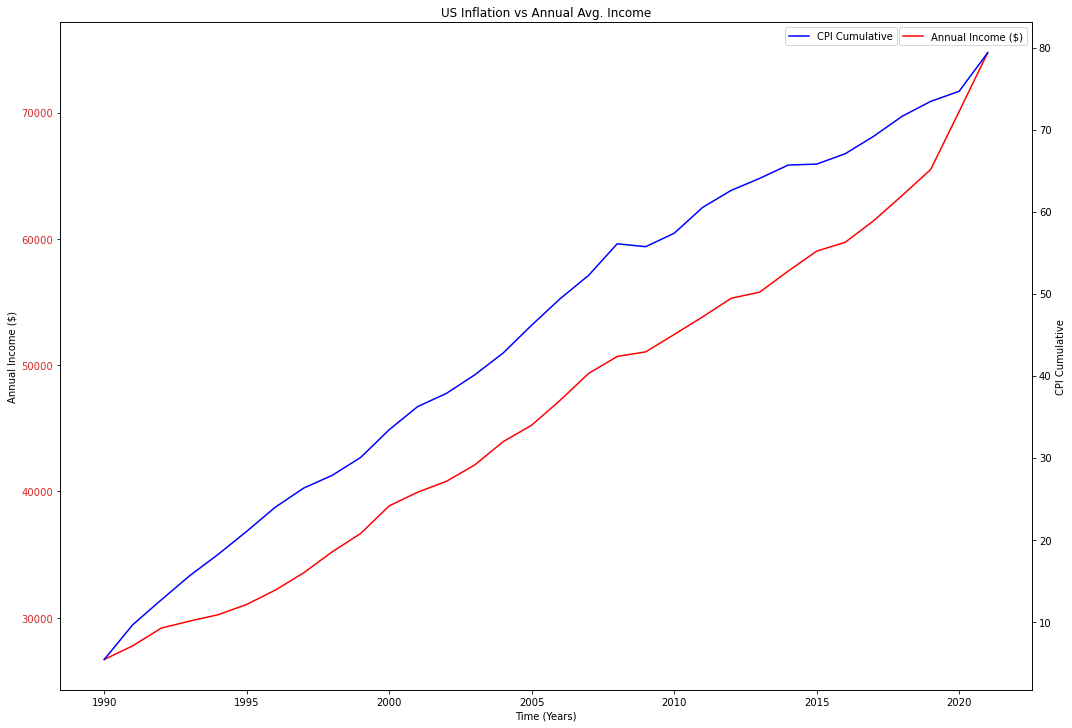

In [8]:
# US relative cumulative CPI vs Annual Avg. Income

# Assigning columns
y2 = us_df["CPI Cumulative"]
x2 = us_df["Annual Wage(Avg.)"]
x1 = us_df["Time"]

fig, ax1 = plt.subplots(figsize = (15,10))

# Assigning the color of each line
color = 'tab:red'

# Adding labels on each axis
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Annual Income ($)')

ax1.plot(x1, x2, color='r')

# Adding tick parameters for Annual Avg. Income
ax1.tick_params(axis='y', labelcolor=color)

# Adding legend for Annual Avg. Income
label2=['Annual Income ($)']
plt.legend(label2, loc="best")

# Plotting on 2 different y-axes
ax2 = ax1.twinx()

ax2.set_ylabel('CPI Cumulative')

ax2.plot(x1, y2, color='b')

# Adding tick parameters for CPI Cumulative
ax2.tick_params(axis='y')

fig.tight_layout()

# Adding legend for CPI Cumulative and graph title
label1=['CPI Cumulative']
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('US Inflation vs Annual Avg. Income')
plt.show()

In [9]:
# Trimming the AU and US Data Frame to get values from Years 2003 to 2021

trim_AU_df = au_df.loc[au_df["Time"]>=2003]
trim_AU_df = trim_AU_df.rename(columns={'Time':'year'})
print(trim_AU_df)

trim_US_df = us_df.loc[us_df["Time"]>=2003]
trim_US_df = trim_US_df.rename(columns={'Time':'year'})
print(trim_US_df)

      Country  year Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI  \
13  Australia  2003         AUD              51798          PC  2.732596   
14  Australia  2004         AUD              54199          PC  2.343255   
15  Australia  2005         AUD              56018          PC  2.691832   
16  Australia  2006         AUD              58402          PC  3.555288   
17  Australia  2007         AUD              61884          PC  2.327611   
18  Australia  2008         AUD              64343          PC  4.350298   
19  Australia  2009         AUD              65362          PC  1.771117   
20  Australia  2010         AUD              69110          PC  2.918340   
21  Australia  2011         AUD              72978          PC  3.303850   
22  Australia  2012         AUD              75149          PC  1.762780   
23  Australia  2013         AUD              76598          PC  2.449889   
24  Australia  2014         AUD              78666          PC  2.487923   
25  Australi

In [10]:
# Using NASDAQ API to fetch global oil prices

# Storing key in a variable
key = "HuzvVbyZtiD8rqcs_m4i"

url = f"https://data.nasdaq.com/api/v3/datasets/OPEC/ORB.json?api_key={key}"

# Making a request to the url and storing in response variable
response = requests.get(url).json()

# Making a Data Frame of the response
oil_df = pd.DataFrame.from_dict(response)

# Grab the Data values, assign them to a new Data Frame and name the columns
new_dataset = pd.DataFrame(oil_df['dataset']['data'],columns=['date','oil_price'])

# Grab the year values and assign them to a new column
new_dataset['year'] = new_dataset['date'].str[0:4].astype(int)

# Using groupby() function to group by years and calculating the mean of oil prices for each year
grouped_df = new_dataset.groupby(['year']).mean()

# Dropping the last 2 years (2022 & 2023) from the data set
new_df = grouped_df.iloc[0:19,:]

# Merging the Data Frames to add Oil Prices
final_US_oil_df = pd.merge(trim_US_df, new_df, on=['year'])
final_AU_oil_df = pd.merge(trim_AU_df, new_df, on=['year'])

print(final_AU_oil_df)
print(final_US_oil_df)

      Country  year Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI  \
0   Australia  2003         AUD              51798          PC  2.732596   
1   Australia  2004         AUD              54199          PC  2.343255   
2   Australia  2005         AUD              56018          PC  2.691832   
3   Australia  2006         AUD              58402          PC  3.555288   
4   Australia  2007         AUD              61884          PC  2.327611   
5   Australia  2008         AUD              64343          PC  4.350298   
6   Australia  2009         AUD              65362          PC  1.771117   
7   Australia  2010         AUD              69110          PC  2.918340   
8   Australia  2011         AUD              72978          PC  3.303850   
9   Australia  2012         AUD              75149          PC  1.762780   
10  Australia  2013         AUD              76598          PC  2.449889   
11  Australia  2014         AUD              78666          PC  2.487923   
12  Australi

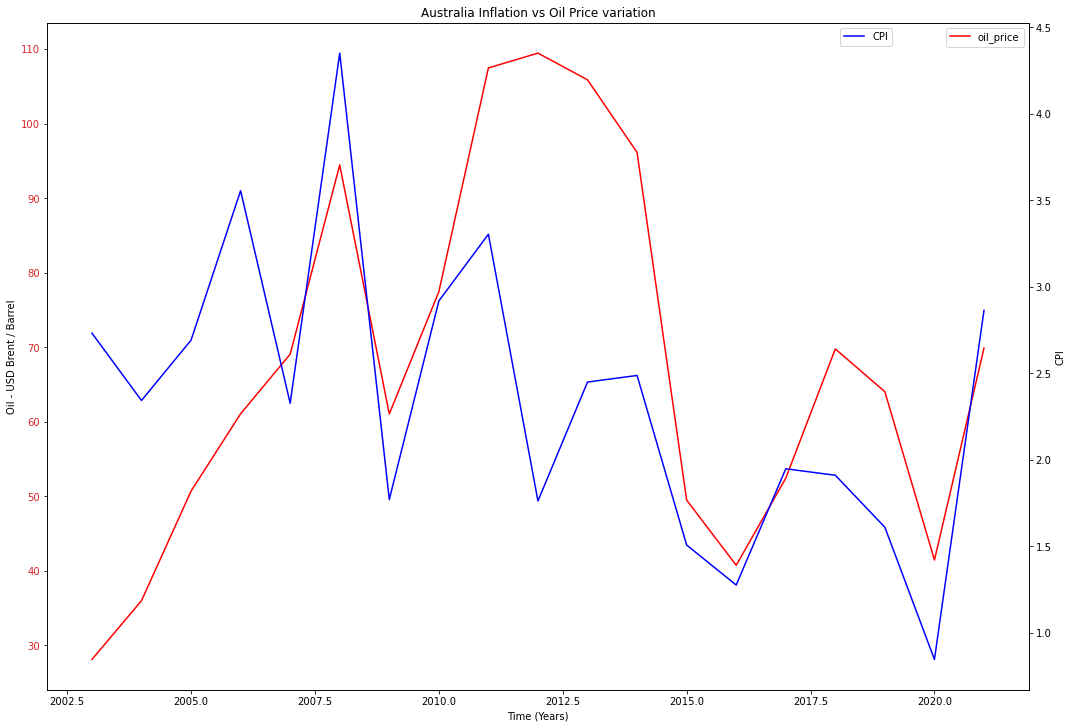

In [11]:
# Assigning columns

y2 = final_AU_oil_df["CPI"]
x2 = final_AU_oil_df["oil_price"]
x1 = final_AU_oil_df["year"]

fig, ax1 = plt.subplots(figsize = (15,10))

# Adding colors to each line
color = 'tab:red'

# Assigning labels to axes
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Oil - USD Brent / Barrel')

ax1.plot(x1, x2, color='r')

# Adding tick parameters for oil price
ax1.tick_params(axis='y', labelcolor=color)

# Adding legend for oil price
label2=['oil_price']
plt.legend(label2, loc="best")

# Plotting on 2 different axes
ax2 = ax1.twinx()

ax2.set_ylabel('CPI')

ax2.plot(x1, y2, color='b')

# Adding tick parameters for CPI
ax2.tick_params(axis='y')

fig.tight_layout()

# Adding legend for CPI and graph title
label1=['CPI']
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('Australia Inflation vs Oil Price variation')
plt.show()

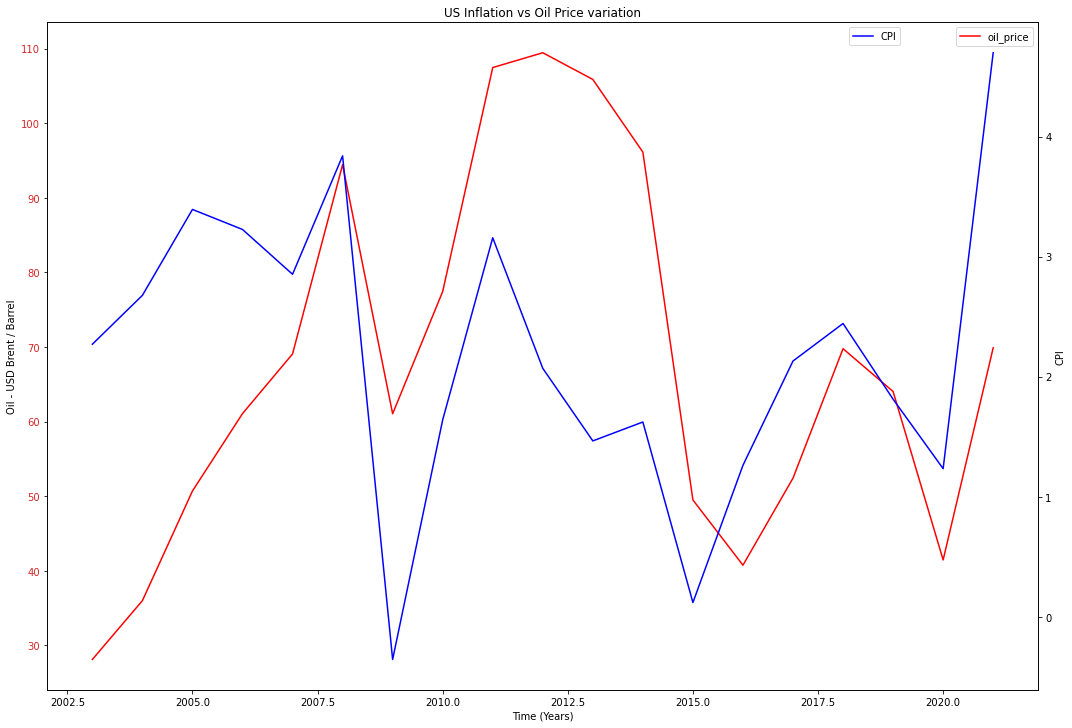

In [12]:
# Assigning columns

y2 = final_US_oil_df["CPI"]
x2 = final_US_oil_df["oil_price"]
x1 = final_US_oil_df["year"]

fig, ax1 = plt.subplots(figsize = (15,10))

# Adding colors to each line
color = 'tab:red'

# Assigning labels to axes
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Oil - USD Brent / Barrel')

ax1.plot(x1, x2, color='r')

# Adding tick parameters for oil price
ax1.tick_params(axis='y', labelcolor=color)

# Adding legend for oil price
label2=['oil_price']
plt.legend(label2, loc="best")

# Plotting on 2 different axes
ax2 = ax1.twinx()

ax2.set_ylabel('CPI')

ax2.plot(x1, y2, color='b')

# Adding tick parameters for CPI
ax2.tick_params(axis='y')

fig.tight_layout()

# Adding legend for CPI and graph title
label1=['CPI']
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('US Inflation vs Oil Price variation')
plt.show()